# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous le nom, le prénom et le numéro étudiant de chaque membre du binôme :
</div>

In [1]:
# Vu Hoang Thuy Duong - 21110221 SCFO

# Clustering géographique

<div class="alert alert-block alert-warning">
Nous allons travailler dans la suite sur les données du TME 1 et TME 2 des lieux d'intérêt à Paris. L'objectif est de caractériser spatialement l'espace parisien à partir des informations sur le nombre de lieux de chaque type. En effectuant un clustering à partir de ces informations, on peut mettre en évidence les régions qui se ressemblent le plus.
</div>

## 1 - Chargement des données et mise en place

<div class="alert alert-block alert-info">
Exécuter tout d'abord le bloc suivant pour charger le jeu de données et les données de <code>'arrondissements.csv'</code> pour pouvoir tracer la limite des arrondissements sur les graphiques.
</div>

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# lecture des données POIs
tableau_poi = pd.read_csv('poi-paris.csv')

# lecture des infos arrondissements
arrondissement=pd.read_csv('arrondissements.csv', sep = ',')

# Transformation de la liste des segments formant un arrondissement de string vers liste de coordonnées.
arrondissement['bords'] = arrondissement['bords'].apply(eval)

# Fonction pour afficher la limite des arrondissements
def tracer_arrondissements():
    for x in arrondissement["bords"]:
        plt.plot([c[0] for c in x], [c[1] for c in x], color = 'black')

<div class="alert alert-block alert-info">
Q1.1 - Dessiner le nuage des points d'intérêts parisiens ainsi que les contours des arrondissements
</div>

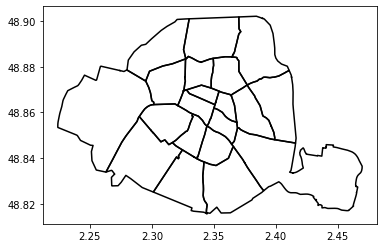

In [3]:
tracer_arrondissements()

<div class="alert alert-block alert-info">
Q1.2 - Copier/coller ci-dessous le code nécessaire pour calculer les K-moyennes du TME précédent.
</div>

In [4]:
 def calcul_affectation(data,centroides):
    # Création du vecteur d'affectation 
    affectation = np.zeros(len(data))
    # On parcourt tous les exemples
    for i in range(len(data)):
        ## Compléter ici pour trouver le centroide le plus proche du i-ème exemple
        affectation[i] = np.sum((data[i] - centroides)**2, axis = 1).argmin()
        
    return affectation

def calcul_barycentres(data, affectation, k):
    # Création de la matrice des centroides
    centroides = np.zeros((k, data.shape[1]))
    # On parcourt tous les clusters
    for i in range(k):
        # On vérifie que le cluster n'est pas vide
        if len(data[affectation == i]) > 0:
            ## Compléter ici pour calculer le barycentre du cluster i
            
            centroides[i,:] = np.mean(data[affectation == i], axis = 0)
                     
        else:
            # si le cluster est vide on tire un exemple au hasard
            centroides[i, :] = data[np.random.randint(len(data))]
    return centroides

def dispersion_intra(data,affectation,centroides):
    # initialisation de la dispersion à 0
    d = 0.
    # on parcourt tous les clusters
    for i in range(len(centroides)):
        d += ((data[affectation==i] - centroides[i]) ** 2).sum()
    return d

# Autre version plus compacte
def dispersion_intra(data,affectation,centroides):
    return np.sum([((data[affectation==i] - centroides[i]) ** 2).sum() for i in range(len(centroides))])

def kmeans(data,k,niter=200):
    ## Initialisation des centroides
    centroides = np.zeros((k, data.shape[1]))
    dispersion = -1
    for i in range(k):
        centroides[i] = data[np.random.randint(len(data))]
    ## Boucle principale
    for i in range(niter):
        affectation = calcul_affectation(data, centroides)
        centroides = calcul_barycentres(data, affectation, k)
        old_dispersion = dispersion
        dispersion = dispersion_intra(data, affectation, centroides)
        if (old_dispersion == dispersion): 
            break
        # print(i, dispersion)
    return affectation, centroides

## 2 - Discrétisation de l'espace 

<div class="alert alert-block alert-warning">
Une première façon d'opérer un découpage géographique de l'espace est de faire une discrétisation en grille de l'espace. Il faut ensuite pouvoir attribuer une case $(i,j)$ à chaque lieu en fonction de sa longitude et sa latitude. La formule qui permet de faire l'attribution en considérant une discrétisation de
$N*N$ cases est la suivante : $i=\lfloor N*\frac{(longitude-lomin)}{(lomax-lomin)}\rfloor$ et $j = \lfloor N*\frac{(latitude - lamin)}{(lamax-lamin)} \rfloor$ , avec $\lfloor x\rfloor$ la partie entière de $x$, $lamin,lamax$ les latitudes minimales et maximales de l'espace et $lomin,lomax$ les longitudes minimales et maximales.
</div>

<div class="alert alert-block alert-info">
Q2.1 - Calculer dans un premier temps <code>lomax, lomin, lamax, lamin</code> correspondant aux latitudes et longitudes minimales et maximales. Créer aussi une variable <code>N = 10</code>.
</div>

In [5]:
N = 10
lomax = tableau_poi["longitude"].max()
lomin = tableau_poi["longitude"].min()
lamax = tableau_poi["latitude"].max()
lamin = tableau_poi["latitude"].min()

<div class="alert alert-block alert-info">
Q2.2 - Donner les fonctions <code>affecte_lat(lat)</code> et <code>affecte_long(long)</code> qui permettent de calculer les coordonnées $i$ et $j$  en fonction de la latitude et de la longitude.
On utilisera <code>np.int32</code> pour calculer la partie entière.
</div>

In [6]:
def affecte_lat(lat):
    return [np.int32(N * (lat[i] - lamin)/(lamax - lamin)) for i in range(len(lat))]

def affecte_long(long):
    return [np.int32(N * (long[i] - lomin)/(lomax - lomin)) for i in range(len(long))]

<div class="alert alert-block alert-info">
Q2.3 - Compléter le tableau <code>tableau_poi</code> en ajoutant une colonne <code>i</code> et une colonne <code>j</code> correspondant aux coordonnées discrétisées des lieux.
</div>

In [7]:
tableau_poi["i"] = affecte_long(tableau_poi["longitude"])
tableau_poi["j"] = affecte_lat(tableau_poi["latitude"])

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour afficher votre espace discrétisé et vérifier vos calculs : <code>tab20</code> est une <em>colormap</em>, une liste de 20 couleurs qui peut être utilisée pour attribuer une couleur à chaque case.
</div>

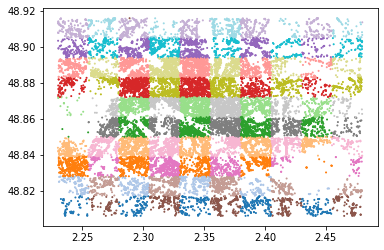

In [8]:
tab20 = plt.get_cmap('tab20')
_ = plt.scatter(
    tableau_poi['longitude'], 
    tableau_poi['latitude'], 
    c = [x % tab20.N for x in N * tableau_poi['i'] + tableau_poi['j']], 
    s = 1, cmap = tab20)

## 3 - Construction du jeu de données

<div class="alert alert-block alert-warning">
Nous allons maintenant construire la description de chaque case  en calculant la distribution des types de lieux dans cette case sous la forme d'un tableau contenant $N*N$ lignes (le nombre de cases) et autant de colonnes que de types : la case $(i,j)$ occupera la ligne $i+j*N$.
</div>

<div class="alert alert-block alert-info">
Q3.1 - Déclarer la variable <code>types</code> contenant la liste des types de lieux.
</div>

In [9]:
types = tableau_poi.columns[5:-2]

<div class="alert alert-block alert-info">
Q3.2 - Déclarer la variable <code>dist_lieux</code> en tant que matrice numpy initialisé avec des 0 et avec les dimensions voulues pour la distribution des types de lieux.
</div>

In [10]:
dist_lieux = np.zeros((len(tableau_poi),2))

<div class="alert alert-block alert-info">
Exécuter le bloc suivant qui permet d'obtenir tous les lieux de la case $(0,0)$. Comment est obtenue la distribution des types ? Comment résout-on le problème lorsqu'il n'y a aucun lieu dans la case ?
</div>

In [11]:
somme = tableau_poi.loc[(tableau_poi['i'] == 0) & (tableau_poi['j'] == 0), types]
np.sum(somme, axis = 0) / np.sum(np.sum(somme, axis = 0) + 1e-6)

furniture_store      0.088889
laundry              0.055556
bakery               0.066667
cafe                 0.044444
home_goods_store     0.144444
clothing_store       0.055556
atm                  0.055556
lodging              0.055556
night_club           0.000000
convenience_store    0.011111
restaurant           0.322222
bar                  0.100000
dtype: float64

<div class="alert alert-block alert-info">
Q3.3 - Faire une boucle pour remplir le tableau <code>dist_lieux</code>.
</div>

In [12]:
for i in range(len(dist_lieux)):
    dist_lieux[i][0] = tableau_poi["i"][i]
    dist_lieux[i][1] = tableau_poi["j"][i]

<div class="alert alert-block alert-info">
Q3.4 - Appliquer l'algorithme des $k$-moyennes sur le jeu obtenu avec un $K=6$ par exemple.
</div>

In [13]:
kmeans(dist_lieux,6)

(array([1., 3., 5., ..., 1., 0., 0.]),
 array([[1.24074074, 7.57635328],
        [3.07027795, 5.423247  ],
        [5.83824537, 0.95167923],
        [5.27514733, 7.52408047],
        [2.05261039, 2.31955442],
        [6.36160714, 4.35401786]]))

## 4 - Analyse du clustering

<div class="alert alert-block alert-warning">
Nous allons maintenant représenter graphiquement le résultat.
</div>

<div class="alert alert-block alert-info">
Exécuter le bloc suivant qui permet de dessiner un seul rectangle dont le coin inférieur gauche est en $(x,y)$ et de hauteur et largeur égales aux pas de discrétisation choisis. Le paramètre <code>color</code> permet d'indiquer que l'on veut la c-ème couleur de la <code>colormap.alpha</code> est un paramètre qui permet de régler la transparence (entre 0 et 1).
 </div>

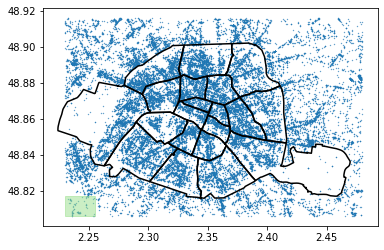

In [14]:
from matplotlib.patches import Rectangle
plt.scatter(tableau_poi["longitude"], tableau_poi['latitude'], s = 0.1)
tracer_arrondissements()
x = lomin
y = lamin
c = 5
_ = plt.gca().add_patch(
    Rectangle((x,y), 
              (lomax-lomin) / N, (lamax-lamin) / N, 
              color= tab20.colors[c], alpha = .5))

<div class="alert alert-block alert-info">
Q4.1 - En s'inspirant du bloc précédent, écrire une boucle qui permet de dessiner chaque case en attribuant une couleur par cluster d'affectation.
</div>

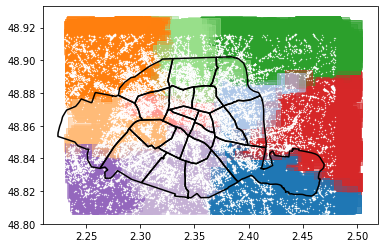

In [15]:
tracer_arrondissements()

index = kmeans(dist_lieux,10)[0]
for i in range(len(tableau_poi)):
    x = tableau_poi["longitude"][i]
    y = tableau_poi["latitude"][i]
    c = int(index[i])
    _ = plt.gca().add_patch(
        Rectangle((x,y), 
                  (lomax-lomin) / N, (lamax-lamin) / N, 
                  color= tab20.colors[c], alpha = .5))
plt.scatter(tableau_poi["longitude"], tableau_poi['latitude'], s = 0.1,color="white")


<div class="alert alert-block alert-info">
Pour analyser les clusters construits, on peut afficher la distribution des types de lieux associée à chaque cluster en étudiant les centroïdes avec le code suivant. Observer vos résultats. Regarder également le nombre d'individus par cluster (et optionnellement la distance moyenne intra-cluster pour chaque cluster).
Essayez avec plus et moins de clusters, avec un pas plus grand et plus petit de discrétisation.
</div>

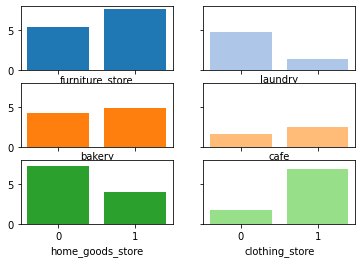

In [16]:
fig, axs = plt.subplots(3, 2, sharey=True,sharex=True)

centroides = kmeans(dist_lieux,6)[1]

for i,k in enumerate(centroides):
    axs.flatten()[i].bar(range(len(k)),k,color=tab20.colors[i])
    axs.flatten()[i].set_xticks(range(len(k)))
    axs.flatten()[i].set_xlabel(types[i],rotation="horizontal")
    #axs.flatten()[i].set_title(types[i],rotation="horizontal")
    #The previous one doesn't work

In [17]:
def d_intra(data,affectation,centroides):
    return [ np.mean(np.sum(((data[affectation==i]-centroides[i]) ** 2),axis=1)) for i in range(len(centroides)) ]

In [18]:
affectation = calcul_affectation(dist_lieux,centroides)
d_intra(dist_lieux,affectation,centroides),[(affectation==i).sum() for i in range(len(centroides))]

([2.6356761507108315,
  2.606596304112424,
  1.1152785240875274,
  2.1248075035021134,
  3.210516659327756,
  2.425751385375833],
 [4711, 4631, 5571, 5780, 4542, 6617])

<div class="alert alert-block alert-info">
Q4.2 - Quels sont les inconvénients de cette méthode ?
</div>

In [19]:
# Les centroides ne sont pas claires à l'observation

# 5-  K-moyennes pour le partitionnement de l'espace

<div class="alert alert-block alert-warning">
Pour obtenir des clusters plus homogènes, il faut partitionner l'espace de manière plus intelligente que par une simple discrétisation linéaire. On peut pour cela utiliser l'algorithme des $K$-moyennes : chaque lieu est décrit par ses coordonnées géographiques qui sont clusterisées par l'algorithme. On espère ainsi obtenir des régions plus homogènes en termes de nombre de lieux.
</div>

<div class="alert alert-block alert-info">
Q5.1 - Créer le tableau numpy <code>geo_lieux</code> qui pour chaque lieu (en ligne) associe ses deux coordonnées (en colonnes).
</div>

In [20]:
geo_lieux = np.array([np.int32(tableau_poi["longitude"]),np.int32(tableau_poi["latitude"])])

<div class="alert alert-block alert-info">
Q5.2 - Utiliser $k$-means pour calculer l'affectation de chaque lieu à un cluster pour $K\_GEO=100$ clusters par exemple en utilisant les coordonnées géographiques. Enregistrer le résultat dans les variables <code>affect_lieux, centroides_lieux</code>.
</div>

In [21]:
K_GEO = 100
affect_lieux,centroides_lieux = kmeans(geo_lieux,K_GEO)

<div class="alert alert-block alert-info">
Exécuter le bloc ci-dessous qui permet de tracer les clusters ainsi constitués et les centroïdes.
</div>

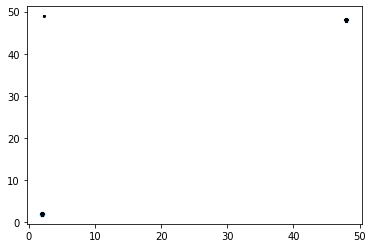

In [26]:
for i in range(K_GEO):
    plt.plot(
        centroides_lieux[i, 0], 
        centroides_lieux[i, 1], marker = "*", color = "black", markersize = 5)
    
    plt.scatter(
        geo_lieux[affect_lieux == i, 0], 
        geo_lieux[affect_lieux == i, 1], color = tab20.colors[(i % 20)], s = 20)

tracer_arrondissements()

<div class="alert alert-block alert-warning">
Il nous reste à créer le jeu de données associé à ce partitionnement de l'espace.
</div>
<div class="alert alert-block alert-info">
Q5.3 - Créer un tableau <code>geo_dist_lieux</code> de taille <code>K_GEO</code> lignes et d'autant de colonnes que de types. Remplir ensuite ce tableau avec la distribution des types de lieux  pour chaque cluster (comme dans le cas de la discrétisation linéaire mais avec nos nouveaux clusters plutôt que les rectangles).
</div>    

<div class="alert alert-block alert-info">
Q5.4 - Appliquer un $k$-moyennes sur ces nouvelles données  avec $k=6$ par exemple et enregistrer le résultat dans les variables <code>geo_affectation, geo_centroides</code>.
</div>

<div class="alert alert-block alert-info">
On peut tracer comme précédement le résultat du clustering sur la carte. Pour cela, pour chaque cluster géographique, on trace les points correspondant à cette affectation dans <code>affect_lieux</code> avec la couleur correspondante dans <code>geo_affectation</code>.
</div>

In [134]:
geo_lieux[affect_lieux==10,0]

array([], dtype=int32)

<div class="alert alert-block alert-info">
Le code suivant permet de représenter chaque centroïde (comme dans le cas de la discrétisation linéaire). Observer le nombre de zones par cluster et la dispersion intra-cluster. Comparer ses résultats aux précédents.
</div>